# Algorithms for Big Data - Exercise 4
This lecture is focused in more detailed understanding of the Convolution neural networks. 

The visualization and the response of the CNN layers will be intestigated and a proper.

We will use the MNIST dataset but other may be used as well.


[Open in Google colab](https://colab.research.google.com/github/rasvob/2020-21-ARD/blob/master/abd_04.ipynb)
[Download from Github](https://github.com/rasvob/2020-21-ARD/blob/master/abd_04.ipynb)

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # images
import numpy as np #numpy
import tensorflow.compat.v2 as tf #use tensorflow v2 as a main 
import tensorflow.keras as keras # required for high level applications
from sklearn.model_selection import train_test_split # split for validation sets
from sklearn.preprocessing import normalize # normalization of the matrix
from scipy.signal import convolve2d # convolutionof the 2D signals

tf.version.VERSION

'2.3.0'

In [2]:
def show_history(history):
    plt.figure()
    for key in history.history.keys():
        plt.plot(history.epoch, history.history[key], label=key)
    plt.legend()
    plt.tight_layout()

def show_example(train_x, train_y, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_x[i].reshape(28,28), cmap=plt.cm.binary)
        plt.xlabel(class_names[train_y[i]])
    plt.show()

In [3]:
# mnist is the basic dataset for image classifaction
dataset = tf.keras.datasets.mnist

# data from any dataset are loaded using the load_Data function
(train_x, train_y), (test_x, test_y) = dataset.load_data()

train_x = train_x.reshape(*train_x.shape, 1)
test_x = test_x.reshape(*test_x.shape, 1)

train_x = train_x/255.0
test_x = test_x/255.0

train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# the data are in the form of 32x32 pixes with values 0-255.
print('Train data shape: ', train_x.shape, train_y.shape)
print('Validation data shape: ', valid_x.shape, valid_y.shape)
print('Test data shape:  ', test_x.shape, test_y.shape)

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names = [str(x) for x in range(10)]
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_count = len(class_names)
print('Class count:', class_count, class_names)


Train data shape:  (48000, 28, 28, 1) (48000,)
Validation data shape:  (12000, 28, 28, 1) (12000,)
Test data shape:   (10000, 28, 28, 1) (10000,)
Class count: 10 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


#### Show example images of the dataset

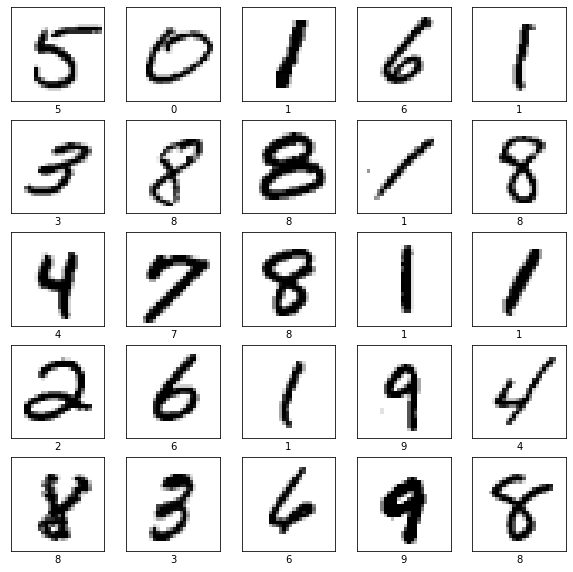

In [4]:
show_example(train_x, train_y, class_names)

### Create a well defined model 

The model is able achieve more the 99% precision on the validation as well as testing sets.

In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'),    
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          9232      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

#### Fit the model on the train data.
Lets train the model on the training data and find the best model using the EarlyStopping callback to find the best model avaialble and achievable.

Epoch 1/50
375/375 [==============================] - 3s 8ms/step - loss: 0.6997 - accuracy: 0.7605 - val_loss: 0.1545 - val_accuracy: 0.9544
Epoch 2/50
375/375 [==============================] - 3s 7ms/step - loss: 0.2069 - accuracy: 0.9402 - val_loss: 0.0898 - val_accuracy: 0.9747
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1400 - accuracy: 0.9597 - val_loss: 0.0648 - val_accuracy: 0.9814
Epoch 4/50
375/375 [==============================] - 4s 10ms/step - loss: 0.1161 - accuracy: 0.9676 - val_loss: 0.0666 - val_accuracy: 0.9815
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0981 - accuracy: 0.9730 - val_loss: 0.0562 - val_accuracy: 0.9845
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0817 - accuracy: 0.9772 - val_loss: 0.0535 - val_accuracy: 0.9851
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.0732 - accuracy: 0.9795 - val_loss: 0.0479 - val_accuracy: 0.9869
E

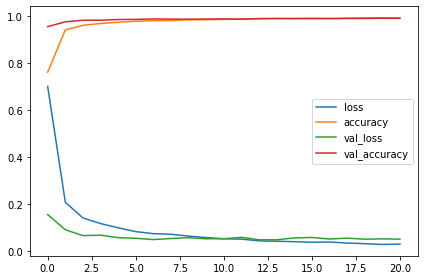

In [6]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, restore_best_weights=True)
history = model.fit(train_x, train_y, validation_data=(valid_x, valid_y), callbacks=[es], epochs=50, batch_size=128)

show_history(history)

test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy: ', test_acc)

## Visualize the layers
Lest see what the network was able to learn from the train data. For that, we need to prepare a new model and see the ouputs of the layers.

In [7]:
# get the outputs form all layers in the model
layer_outputs = [layer.output for layer in model.layers]
# create the model that has single input and as an output all the outputs from the layers. 
# Because the layers are connected then the output from first layer is propagated into second layer and the output is computed o it.
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

# get all the outputs from the model for 10-th input
activations = activation_model.predict(train_x[10].reshape(1,28,28,1))
 
# this functions shows the output from each filters
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

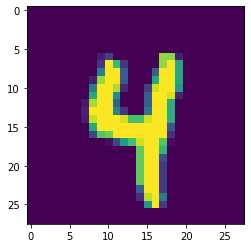

In [25]:
# show the input image
plt.imshow(train_x[10][:,:,0]);

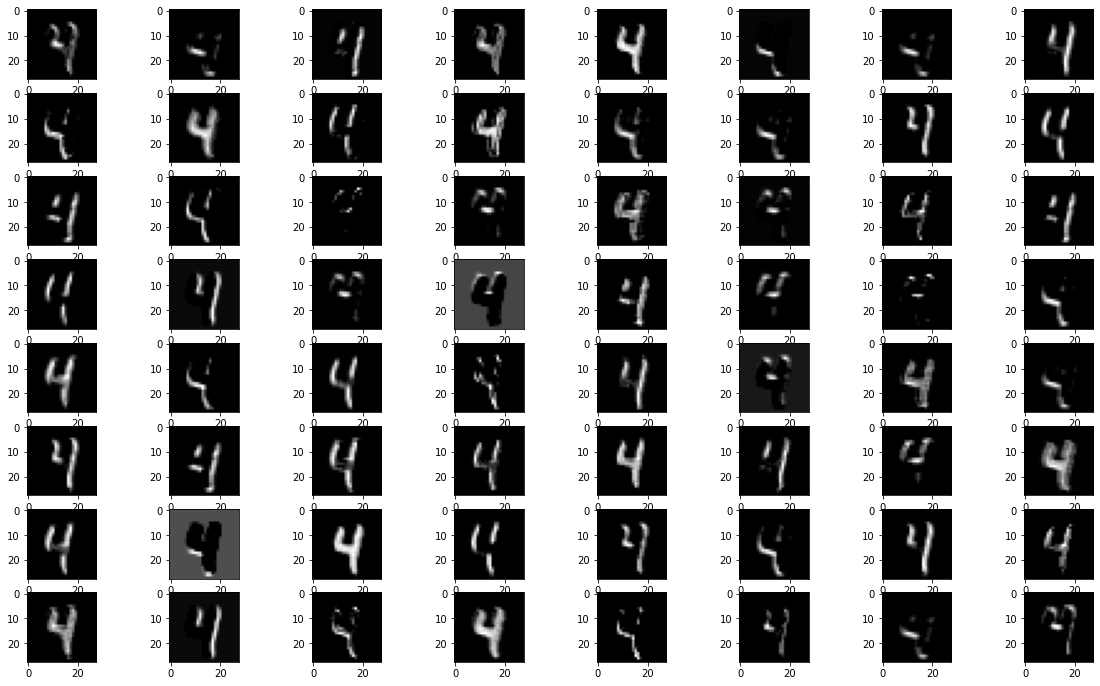

In [20]:
# show the output from the first layer - CNN2D
display_activation(activations, 8, 8, 0)

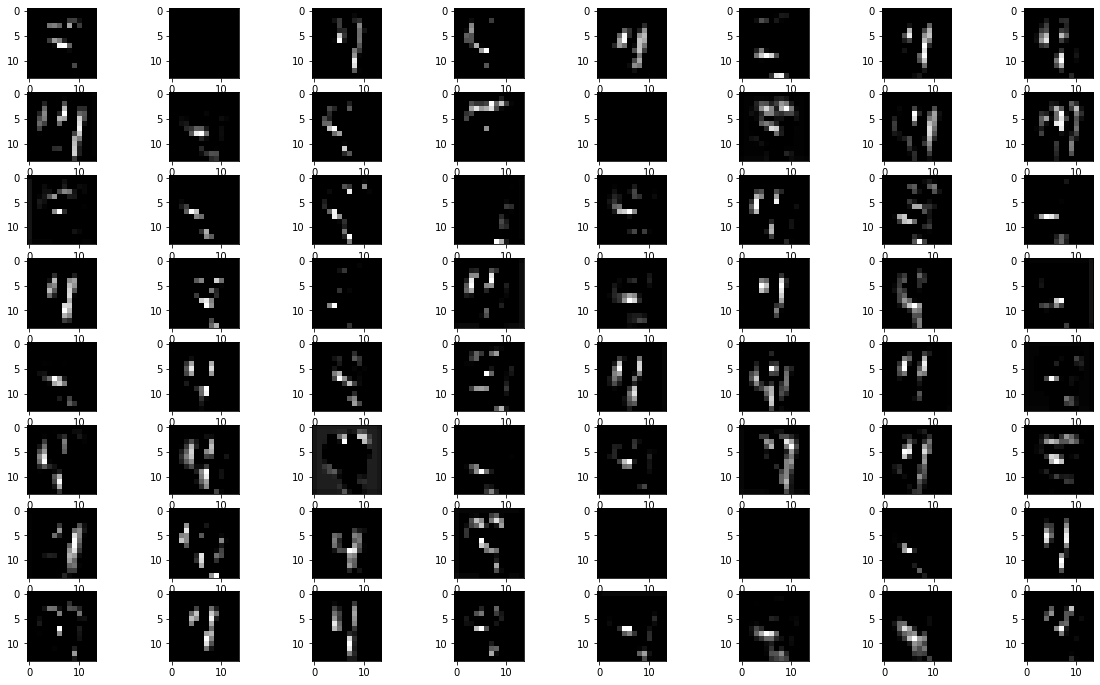

In [21]:
# show the second convolution layer
display_activation(activations, 8, 8, 2)

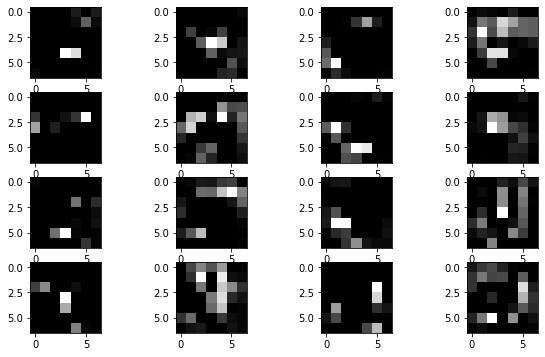

In [22]:
# show the third activation layer
display_activation(activations, 4, 4, 4)

## The weights of each layer
The weight can be extracted from layer as a tuple of weights and biasses

In [26]:
filters, biases = model.layers[0].get_weights()
print(filters.shape, biases.shape)

(3, 3, 1, 64) (64,)


In [27]:
#### The weidhts may be normalized in to 0-1 interval

In [30]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

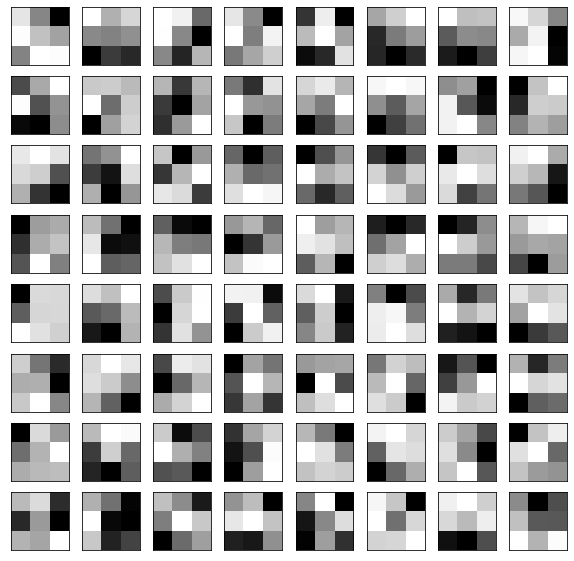

In [31]:
plt.figure(figsize=(10,10))

# plot first few filters
n_filters = 64
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis
    ax = plt.subplot(8, 8, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
  
# show the figure
plt.show()

## Autoencoder
The autoencoder is a special type of neural network that is able to learn without the classes just from the input data. It is equivalent to the feature extraction from the data.

It's worth a mention that we are using binary crossentropy loss, thus we compare images on per-pixel basis.
- You can view [this link](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) for more information about Bin. CE

In [124]:
autoencoder = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),    
    keras.layers.MaxPooling2D((2, 2), padding='same', activity_regularizer=keras.regularizers.l1(10e-3)),
    # a 128 values of the minimized knowledge / features
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.UpSampling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.UpSampling2D((2,2)),
    
    keras.layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

autoencoder.summary()

autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 7, 7, 8)           2312      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 4, 4, 8)         

### Fit the model
The model may be fitted as much as possible, this model converges but slowly.

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.2600 - accuracy: 0.7888 - val_loss: 0.1933 - val_accuracy: 0.7866
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1795 - accuracy: 0.7929 - val_loss: 0.1679 - val_accuracy: 0.7957
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1597 - accuracy: 0.7997 - val_loss: 0.1533 - val_accuracy: 0.8045
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1481 - accuracy: 0.8032 - val_loss: 0.1442 - val_accuracy: 0.8047
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1412 - accuracy: 0.8049 - val_loss: 0.1384 - val_accuracy: 0.8070
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1361 - accuracy: 0.8060 - val_loss: 0.1338 - val_accuracy: 0.8076
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1321 - accuracy: 0.8068 - val_loss: 0.1314 - val_accuracy: 0.8056

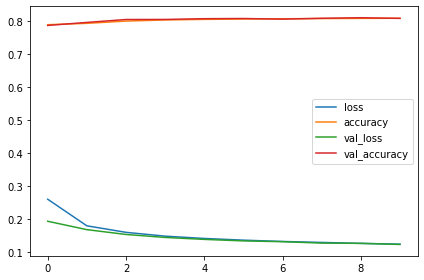

In [125]:
history = autoencoder.fit(train_x, train_x, validation_data=(valid_x, valid_x), epochs=10, batch_size=128)

show_history(history)

### Generate original and reconstructed images
The autoencoder fits on the original data on input as well as on output, therefore it is possible to generate reconstructed images.

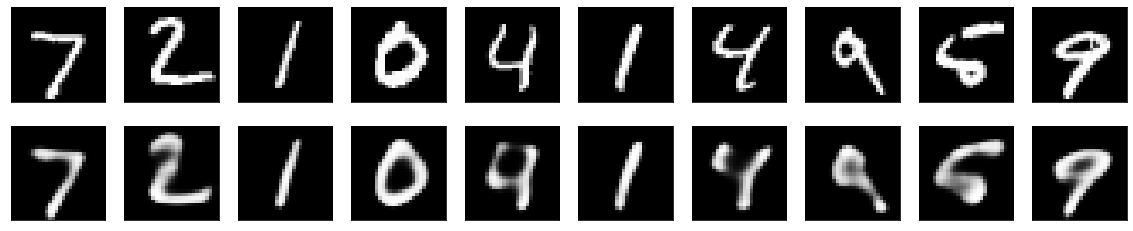

In [126]:
predicted = autoencoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1+n)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Vizualize the encoded vectors
The vectors that are generated by the encoder may be vizualized.

In [127]:
encoder = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), padding='same'),
    keras.layers.Conv2D(8, (3,3), padding='same', activation='relu'),    
    keras.layers.MaxPooling2D((2, 2), padding='same'),
])

# encoder.compile(optimizer='adam', loss='binary_crossentropy')
encoder.set_weights(autoencoder.get_weights()[:6])

for layer in encoder.layers:
  layer.trainable = False

encoder.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 7, 7, 8)           2312      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 4, 4, 8)           0         
Total params: 21,416
Trainable params: 0
Non-trainable params: 21,416
_________________________________________________

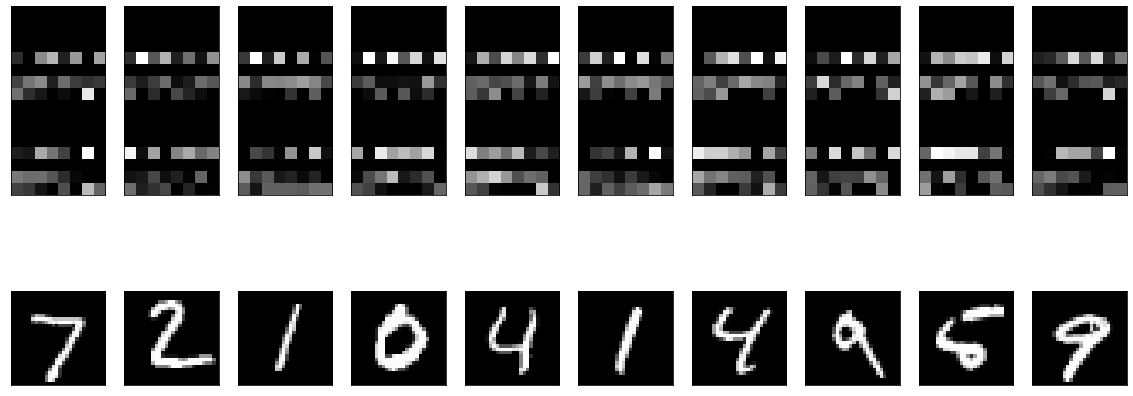

In [128]:
encoded = encoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(encoded[i].reshape(8, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(test_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Is the encoder better than the previous one?
The encoder generated using the autoencoder principle generate a compressed representation of the input. The inner vector with 128 values is much smaller and the goal of the autoencoder is different than from the classifier, therefore the generated representation is usually better using the classifier directly.
Some variants of encoder are able to generate better representation - a sparse autoencoders that generate sparse representation for exmaple. 

In [102]:

encoder.add(keras.layers.Flatten())
encoder.add(keras.layers.Dense(64, activation='relu'))
encoder.add(keras.layers.Dropout(0.25))
encoder.add(keras.layers.Dense(32, activation='relu'))
encoder.add(keras.layers.Dropout(0.25))
encoder.add(keras.layers.Dense(10, activation='softmax'))




In [103]:
encoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
encoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 8)           2312      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2495 - accuracy: 0.9256 - val_loss: 0.1569 - val_accuracy: 0.9523
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2439 - accuracy: 0.9287 - val_loss: 0.1454 - val_accuracy: 0.9534
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2410 - accuracy: 0.9286 - val_loss: 0.1581 - val_accuracy: 0.9546
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2363 - accuracy: 0.9305 - val_loss: 0.1569 - val_accuracy: 0.9528
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9317 - val_loss: 0.1248 - val_accuracy: 0.9620
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2312 - accuracy: 0.9311 - val_loss: 0.1332 - val_accuracy: 0.9579
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2267 - accuracy: 0.9336 - val_loss: 0.1273 - val_accuracy:

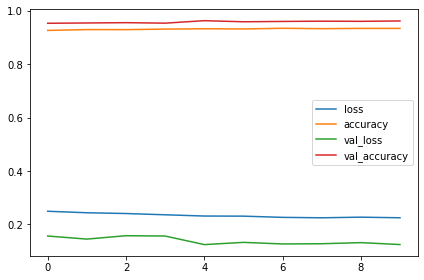

In [105]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=7, restore_best_weights=True)

history = encoder.fit(train_x, train_y, validation_data=(valid_x, valid_y), callbacks = [es], epochs=10)

show_history(history)

test_loss, test_acc = encoder.evaluate(test_x, test_y)
print('Test accuracy: ', test_acc)

## Denoising-autoencoder
The denoising autoencoder is a autoencoder that will learn how to remove random noise from the images. 

First, noisy images have to be generated. 

Then the autoencoder need to be created and trained. 

Then denosed images may be reconstructed.

In [ ]:
noise_factor = 0.5
noisy_train_x = np.clip(train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape), 0., 1.)
noisy_valid_x = np.clip(valid_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=valid_x.shape), 0., 1.)
noisy_test_x = np.clip(test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape), 0., 1.) 


n = 10
plt.figure(figsize=(2*n, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(train_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(noisy_train_x[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Tasks for Lecture / Exercise
1. Implement the autoencoder that do something usefull like denoising, implement it on the data defined above.
2. The Keras contains stored models that may be used for classification. The pretrained models may be used effectivelly to classify data, e.g. images, using the state of the art models. Try to investigate the architecture of the stored models and use the for classification of sample data downloaded from the internet.
  1. Try VGG16 model and investigrate its architecture.
  2. Try ResNet model architecture.